## **Background**
Gcoffee is production house of coffe that selling any coffee and non-coffee menus in several ofline store. In this project, we will analyze sales performance, especially retention rate cust from in Q2 period(April-June). The analyze will be focused on a store that have lack sales performance in Q2 period which is store 6 with name of store is G Coffee @ Alam Tun Hussein Onn. 

In [76]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Datset**

In [77]:
tr= r"C:\Users\fahru\Documents\SQL\Export Gcoffee\trx25.csv"

trx25= pd.read_csv(tr)
trx25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820194 entries, 0 to 1820193
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   transaction_id     object 
 1   store_id           int64  
 2   payment_method_id  int64  
 3   voucher_id         float64
 4   user_id            float64
 5   original_amount    float64
 6   discount_applied   float64
 7   final_amount       float64
 8   created_at         object 
dtypes: float64(5), int64(2), object(2)
memory usage: 125.0+ MB


## **EDA**

In [97]:
trx25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820194 entries, 0 to 1820193
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   transaction_id     object 
 1   store_id           int64  
 2   payment_method_id  int64  
 3   voucher_id         float64
 4   user_id            float64
 5   original_amount    float64
 6   discount_applied   float64
 7   final_amount       float64
 8   created_at         object 
dtypes: float64(5), int64(2), object(2)
memory usage: 125.0+ MB


In [99]:
trx25.isnull().sum()

transaction_id             0
store_id                   0
payment_method_id          0
voucher_id           1763975
user_id                18349
original_amount            0
discount_applied           0
final_amount               0
created_at                 0
dtype: int64

One of important variable to be use in this analysis which is user_id has missing value. Missing value indicated transaction from non-member since member customer has user_id otherwise.

In [100]:
trx25['user_id'].min()

2.0

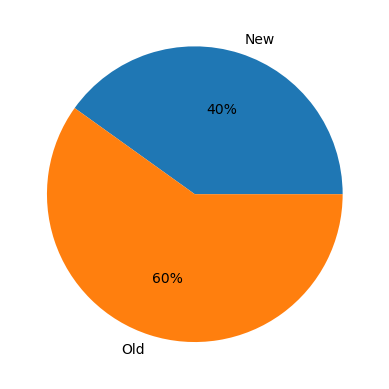

In [125]:
trx25_eda= trx25.copy()
def cat(x):
    if x['user_id']<1654913:
        return 'Old'
    else:
        return 'New'
trx25_eda['cust_category']= trx25_eda.apply(cat,axis=1)
prop= trx25_eda.groupby('cust_category')['transaction_id'].count().reset_index()
prop
plt.pie(prop['transaction_id'], labels=prop['cust_category'], autopct='%.0f%%')

plt.show()

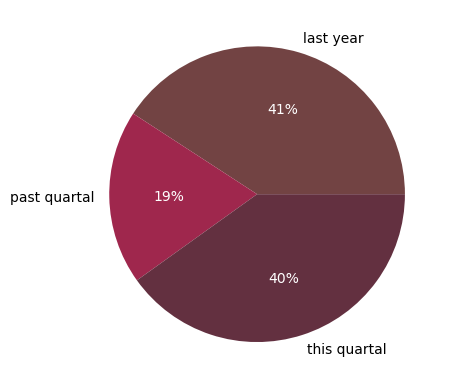

In [131]:
def catnual(x):
    if x['user_id']<1127827:
        return 'last year'
    elif x['user_id']>=1127827 and x['user_id']<1654913:
        return 'past quartal'
    else:
        return 'this quartal'
trx25_eda['annual_category']= trx25_eda.apply(catnual, axis=1)
prep= trx25_eda.groupby('annual_category')['transaction_id'].count().reset_index()
color=["#724343FF", '#9F274D', "#633040"]
_, labels, autopct= plt.pie(prep['transaction_id'], labels=prep['annual_category'], autopct='%.0f%%', colors=color)
plt.setp(autopct, color='white')

plt.show()

From chart above shows more than half customer member that take transaction in Q2 was already member/had first transaction in the past, even last year.

## **Data Cleaning**

Select transaction from Store 6 Only.

In [78]:
trx_clean = trx25[(trx25['store_id']==6) & (trx25['user_id'].notnull())]

trx_clean.head()

,transaction_id,store_id,payment_method_id,voucher_id,user_id,original_amount,discount_applied,final_amount,created_at
16,000092da-9845-49bc-8ff6-fa2657b95261,6,1,NaN,1158077.0,18.0,0.0,18.0,2025-06-26 09:20:02
25,0000c107-2d7d-4a83-a856-e68c14280df0,6,3,NaN,2180411.0,21.5,0.0,21.5,2025-06-28 11:32:45
37,00010fc2-3dbc-4aff-9c8d-d735ee2bb93f,6,3,NaN,1995324.0,65.0,0.0,65.0,2025-05-28 11:04:27
43,0001bb6b-12db-4da8-a66d-9cb43e280342,6,4,NaN,1885869.0,48.0,0.0,48.0,2025-05-09 14:35:29
50,0001f12d-84bd-4279-8284-ac157369377c,6,1,NaN,1890292.0,12.0,0.0,12.0,2025-05-10 12:49:46


In [79]:
trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179337 entries, 16 to 1820186
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   transaction_id     179337 non-null  object 
 1   store_id           179337 non-null  int64  
 2   payment_method_id  179337 non-null  int64  
 3   voucher_id         5594 non-null    float64
 4   user_id            179337 non-null  float64
 5   original_amount    179337 non-null  float64
 6   discount_applied   179337 non-null  float64
 7   final_amount       179337 non-null  float64
 8   created_at         179337 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Unfortunetly we can't analyze non-member cust because they are haven't unique value that can represented them. So we will looking for retention rate of member cust that able to see from user_id in their transaction.

created_at must be datetime value, so we need to convert them first.

In [80]:
trx_clean['created_at']= pd.to_datetime(trx_clean['created_at'])
trx_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179337 entries, 16 to 1820186
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     179337 non-null  object        
 1   store_id           179337 non-null  int64         
 2   payment_method_id  179337 non-null  int64         
 3   voucher_id         5594 non-null    float64       
 4   user_id            179337 non-null  float64       
 5   original_amount    179337 non-null  float64       
 6   discount_applied   179337 non-null  float64       
 7   final_amount       179337 non-null  float64       
 8   created_at         179337 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


C:\Users\fahru\AppData\Local\Temp\ipykernel_32464\2338949717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trx_clean['created_at']= pd.to_datetime(trx_clean['created_at'])


## **Analysis**

### **Weeklly Cohort**

We trying to analyze retention rate per weeks.

In [81]:
# Create week column
trx= trx_clean.copy()
trx['weeks']= trx['created_at'].dt.isocalendar().week
trx.head()

,transaction_id,store_id,payment_method_id,voucher_id,user_id,original_amount,discount_applied,final_amount,created_at,weeks
16,000092da-9845-49bc-8ff6-fa2657b95261,6,1,NaN,1158077.0,18.0,0.0,18.0,2025-06-26 09:20:02,26
25,0000c107-2d7d-4a83-a856-e68c14280df0,6,3,NaN,2180411.0,21.5,0.0,21.5,2025-06-28 11:32:45,26
37,00010fc2-3dbc-4aff-9c8d-d735ee2bb93f,6,3,NaN,1995324.0,65.0,0.0,65.0,2025-05-28 11:04:27,22
43,0001bb6b-12db-4da8-a66d-9cb43e280342,6,4,NaN,1885869.0,48.0,0.0,48.0,2025-05-09 14:35:29,19
50,0001f12d-84bd-4279-8284-ac157369377c,6,1,NaN,1890292.0,12.0,0.0,12.0,2025-05-10 12:49:46,19


In [82]:
np.sort(trx['weeks'].unique().tolist())

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [83]:
# Search first week
first= trx.groupby('user_id')['weeks'].min().reset_index()
first.columns= ['user_id','first_week']
trx= trx.merge(first, on='user_id', how='left')
trx.head()

,transaction_id,store_id,payment_method_id,voucher_id,user_id,original_amount,discount_applied,final_amount,created_at,weeks,first_week
0,000092da-9845-49bc-8ff6-fa2657b95261,6,1,NaN,1158077.0,18.0,0.0,18.0,2025-06-26 09:20:02,26,23
1,0000c107-2d7d-4a83-a856-e68c14280df0,6,3,NaN,2180411.0,21.5,0.0,21.5,2025-06-28 11:32:45,26,26
2,00010fc2-3dbc-4aff-9c8d-d735ee2bb93f,6,3,NaN,1995324.0,65.0,0.0,65.0,2025-05-28 11:04:27,22,22
3,0001bb6b-12db-4da8-a66d-9cb43e280342,6,4,NaN,1885869.0,48.0,0.0,48.0,2025-05-09 14:35:29,19,19
4,0001f12d-84bd-4279-8284-ac157369377c,6,1,NaN,1890292.0,12.0,0.0,12.0,2025-05-10 12:49:46,19,19


In [84]:
# Seacrh cohort distance

trx['cohort_distance']= (trx['weeks']-trx['first_week']).apply(lambda x:x+1)
trx.head()

,transaction_id,store_id,payment_method_id,voucher_id,user_id,original_amount,discount_applied,final_amount,created_at,weeks,first_week,cohort_distance
0,000092da-9845-49bc-8ff6-fa2657b95261,6,1,NaN,1158077.0,18.0,0.0,18.0,2025-06-26 09:20:02,26,23,4
1,0000c107-2d7d-4a83-a856-e68c14280df0,6,3,NaN,2180411.0,21.5,0.0,21.5,2025-06-28 11:32:45,26,26,1
2,00010fc2-3dbc-4aff-9c8d-d735ee2bb93f,6,3,NaN,1995324.0,65.0,0.0,65.0,2025-05-28 11:04:27,22,22,1
3,0001bb6b-12db-4da8-a66d-9cb43e280342,6,4,NaN,1885869.0,48.0,0.0,48.0,2025-05-09 14:35:29,19,19,1
4,0001f12d-84bd-4279-8284-ac157369377c,6,1,NaN,1890292.0,12.0,0.0,12.0,2025-05-10 12:49:46,19,19,1


In [85]:
np.sort(trx['cohort_distance'].unique().tolist())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [86]:
# Create pivot
pivot= pd.pivot_table(data=trx, index='first_week', columns='cohort_distance', 
                      values='user_id', aggfunc=pd.Series.nunique)
pivot_cohort= pivot.div(pivot[1], axis=0)
pivot_cohort

cohort_distance,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_week,,,,,,,,,,,,,,
14,1.0,0.006804,0.006039,0.005869,0.005869,0.005018,0.006039,0.006294,0.004933,0.003487,0.004593,0.004508,0.003913,0.00034
15,1.0,0.005971,0.004806,0.004879,0.005025,0.004806,0.005316,0.005899,0.004369,0.004588,0.004515,0.004151,0.000947,NaN
16,1.0,0.004902,0.004530,0.006016,0.005421,0.004827,0.005644,0.004307,0.004010,0.003491,0.003268,0.000817,NaN,NaN
17,1.0,0.004903,0.004978,0.005869,0.004309,0.004681,0.004606,0.004458,0.006389,0.004606,0.000446,NaN,NaN,NaN
18,1.0,0.004672,0.005191,0.004894,0.006081,0.005858,0.004672,0.004820,0.003856,0.000519,NaN,NaN,NaN,NaN
19,1.0,0.004699,0.004774,0.005072,0.003655,0.003953,0.004699,0.003058,0.000373,NaN,NaN,NaN,NaN,NaN
20,1.0,0.005002,0.005457,0.004017,0.004396,0.004775,0.005153,0.000606,NaN,NaN,NaN,NaN,NaN,NaN
21,1.0,0.005483,0.004149,0.004594,0.003927,0.004371,0.000667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1.0,0.005275,0.005502,0.004446,0.005125,0.000452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Seacrh cohort size
pivot_size= pivot.iloc[:,0].reset_index()
pivot_size= pivot_size.set_index('first_week')
pivot_size

,1
first_week,
14,11757.0
15,13732.0
16,13465.0
17,13460.0
18,13485.0
19,13406.0
20,13195.0
21,13497.0
22,13269.0


## **Result**

Weekly Cohort Result

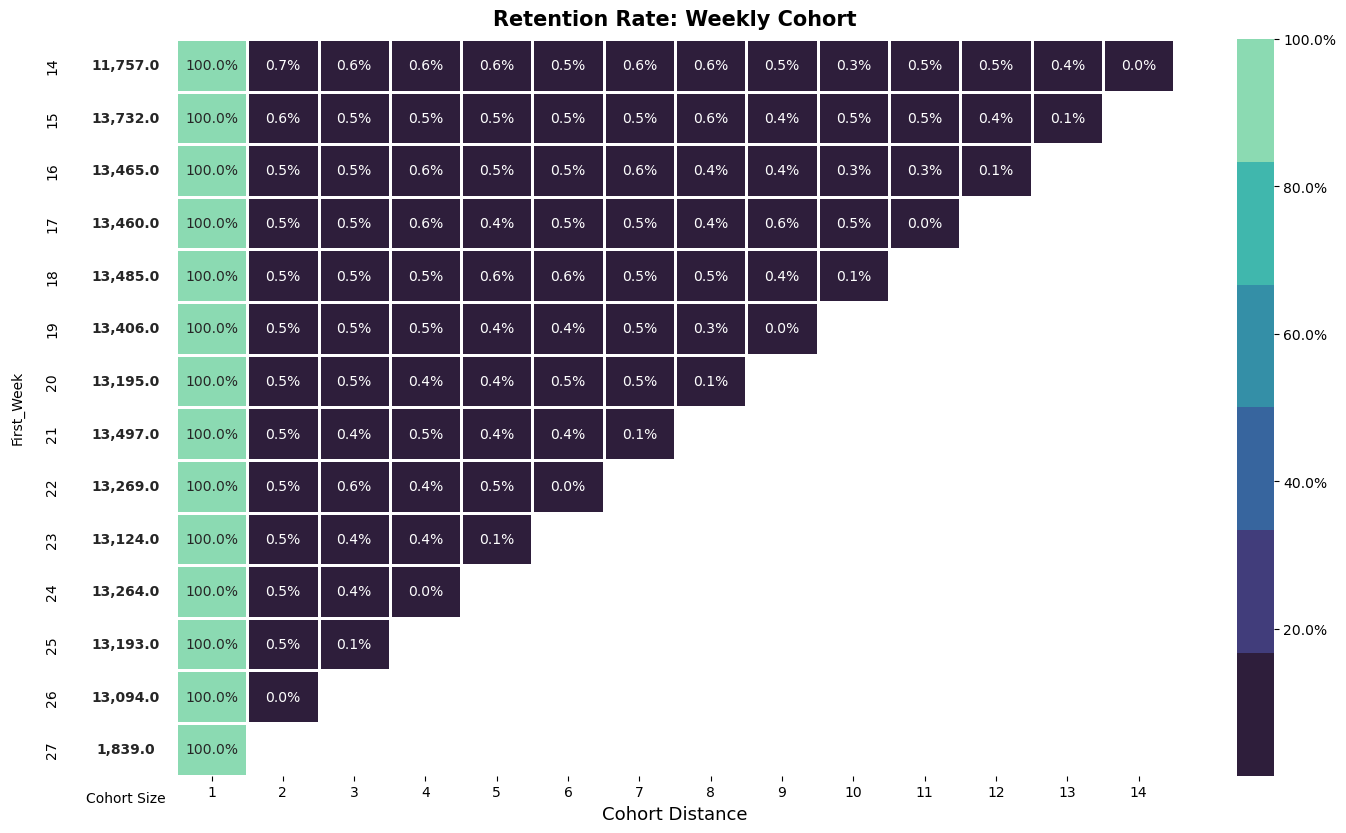

In [89]:
# Visualize Result
from matplotlib.colors import ListedColormap

fig, ax= plt.subplots(1,2, figsize=(14,8), gridspec_kw={'width_ratios':[1,11]}, sharey='row')
sns.heatmap(pivot_cohort, annot=True, annot_kws={'size':10}, fmt='.1%', ax=ax[1], linewidth=2, 
            cmap=sns.color_palette('mako'), cbar_kws={'format':'{x:.1%}'})
ax[1].tick_params(left=False)
ax[1].set_ylabel("")
ax[1].set_xlabel('Cohort Distance', size=13) 

co= '#FFFFFF'
color= ListedColormap([co])
sns.heatmap(pivot_size, annot=True, annot_kws={'fontweight':'bold'}, ax=ax[0], fmt=',',
             cbar=False, cmap=color)
ax[0].tick_params(axis='both',left=False, bottom=False)
ax[0].set_xticklabels("")
ax[0].set_xlabel('Cohort Size')
ax[0].set_ylabel('First_Week',labelpad=15)
plt.title('Retention Rate: Weekly Cohort', size=15, fontweight='bold', pad=10)
plt.tight_layout(pad=-0.5)

plt.show()

Result of analysis shows lack of retention rate from member cust. That can recognized by value of retention rate that even below than 10% for each week, which is means below of 10% of total cust in that week had transaction again in the next weeks.